In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 M

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import pandas as pd
import pickle
from pycaret.clustering import *

# 모델 로드
with open('/content/drive/MyDrive/A하금티/data/kmeans_model_2.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# 로드된 모델 사용
# print(loaded_model)

train_df=pd.read_csv("/content/drive/MyDrive/A하금티/data/jonse_data.csv")

sampleJson = '{"dongName":"화곡동", "policeOffice":"3","subway":"3", "school":"2", "mart":"2", "bus":"2", "price":"7500"}'
sampleData= json.loads(sampleJson)

police = {"1":0,"2":1,"3":2}
school = {"1":2,"2":4,"3":6}
mart={"1":1,"2":2,"3":3}
subway={"1":0.72,"2":0.5,"3":0.35}
bus={"1":16,"2":23,"3":30}

police_data = police[sampleData["policeOffice"]]
school_data = school[sampleData["school"]]
subway_data = subway[sampleData["subway"]]
mart_data = mart[sampleData["mart"]]
dong_data = sampleData["dongName"]
price=int(sampleData["price"])
bus_data = bus[sampleData["bus"]]

columns = ['ATCLNO', '동', 'PRC', '500m_내_마트수', '500m_내_버스수','500m_내_경찰수', '500m_내_학교수', '가장가까운지하철거리']
data=[["1", dong_data, price, mart_data, bus_data, police_data, school_data, subway_data]]
input_df = pd.DataFrame(data, columns=columns)

clust_df=pd.concat([input_df, train_df]).reset_index(drop=True)

clustering_setup = setup(data=clust_df,
                         normalize=True,
                         ignore_features=['ATCLNO', '동'],
                         session_id=123,
                         verbose=False
                         )
clustered_data = assign_model(loaded_model)


out_df = clustered_data[clustered_data["Cluster"] == clustered_data["Cluster"][0]].reset_index()

out_df=out_df[1:]
out_df['index'] = out_df['index'] - 1
out_df.head()

out_df["ATCLNO"] = train_df["ATCLNO"]
out_df["동"] = train_df["동"]

# 동 필터링
out_df = out_df[out_df["동"] == dong_data]

# price 필터링
out_df = out_df[out_df["PRC"] < (price * 1.2)]

# 정렬
if sampleData["policeOffice"] == "3" :
  out_df.sort_values(by=["500m_내_경찰수"], inplace=True)
if sampleData["school"] == "3" :
  out_df.sort_values(by=["500m_내_학교수"], inplace=True)
if sampleData["subway"] == "3" :
  out_df.sort_values(by=["가장가까운지하철거리"], ascending=False, inplace=True)
if sampleData["bus"] == "3" :
  out_df.sort_values(by=["500m_내_버스수"], inplace=True)
if sampleData["mart"] == "3" :
  out_df.sort_values(by=["500m_내_마트수"], inplace=True)

out_df = out_df[0:10]

# json 변경
json_data = out_df["ATCLNO"].values.tolist()

result = {
    "data" : json_data
}

print(result)

{'data': [2430671984, 2434097865, 2430976149, 2432400350, 2433977436, 2432622833, 2434236321, 2429895379, 2432208321, 2433071424]}


In [3]:
# 군집 특성 확인
cluster_centroids = loaded_model.cluster_centers_
print('Cluster Centroids:')
print(cluster_centroids)


Cluster Centroids:
[[-0.35823442 -0.00691113 -0.0468061  -0.34000032  1.12017067 -0.20869823]
 [ 1.90454737  0.02127927  0.08013931 -0.43205774 -0.10657093 -0.03847744]
 [-0.433134    0.85557605  0.78100906  0.4042543  -0.54375554 -0.3064245 ]
 [-0.29695878 -0.80806917 -0.73619329  0.1261272  -0.35362728  0.47891533]]


In [ ]:
len(cluster_centroids)

4

In [ ]:
clustered_data['Cluster']

0       Cluster 2
1       Cluster 2
2       Cluster 2
3       Cluster 2
4       Cluster 2
          ...    
7417    Cluster 3
7418    Cluster 3
7419    Cluster 1
7420    Cluster 1
7421    Cluster 1
Name: Cluster, Length: 7422, dtype: object

In [4]:
clustered_1=clustered_data[clustered_data['Cluster']=='Cluster 0']
clustered_2=clustered_data[clustered_data['Cluster']=='Cluster 1']
clustered_3=clustered_data[clustered_data['Cluster']=='Cluster 2']
clustered_4=clustered_data[clustered_data['Cluster']=='Cluster 3']

In [5]:
# import oracledb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from matplotlib.ticker import StrMethodFormatter,FormatStrFormatter
pd.options.display.float_format = '{:.5f}'.format
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [ ]:
clustered_1 #버스정류장 개많음

,PRC,500m_내_마트수,500m_내_버스수,500m_내_경찰수,500m_내_학교수,가장가까운지하철거리,Cluster
27,62000,0,29,1,2,0.17984,Cluster 1
28,80000,0,13,0,1,0.52192,Cluster 1
29,75000,0,13,0,1,0.59316,Cluster 1
30,70000,0,13,0,1,0.59316,Cluster 1
31,97000,0,20,0,6,0.73331,Cluster 1
...,...,...,...,...,...,...,...
7389,45000,1,29,0,1,0.14330,Cluster 1
7390,45000,1,29,0,1,0.14330,Cluster 1
7419,110000,0,22,0,1,0.91328,Cluster 1
7420,110000,0,22,0,1,0.91328,Cluster 1


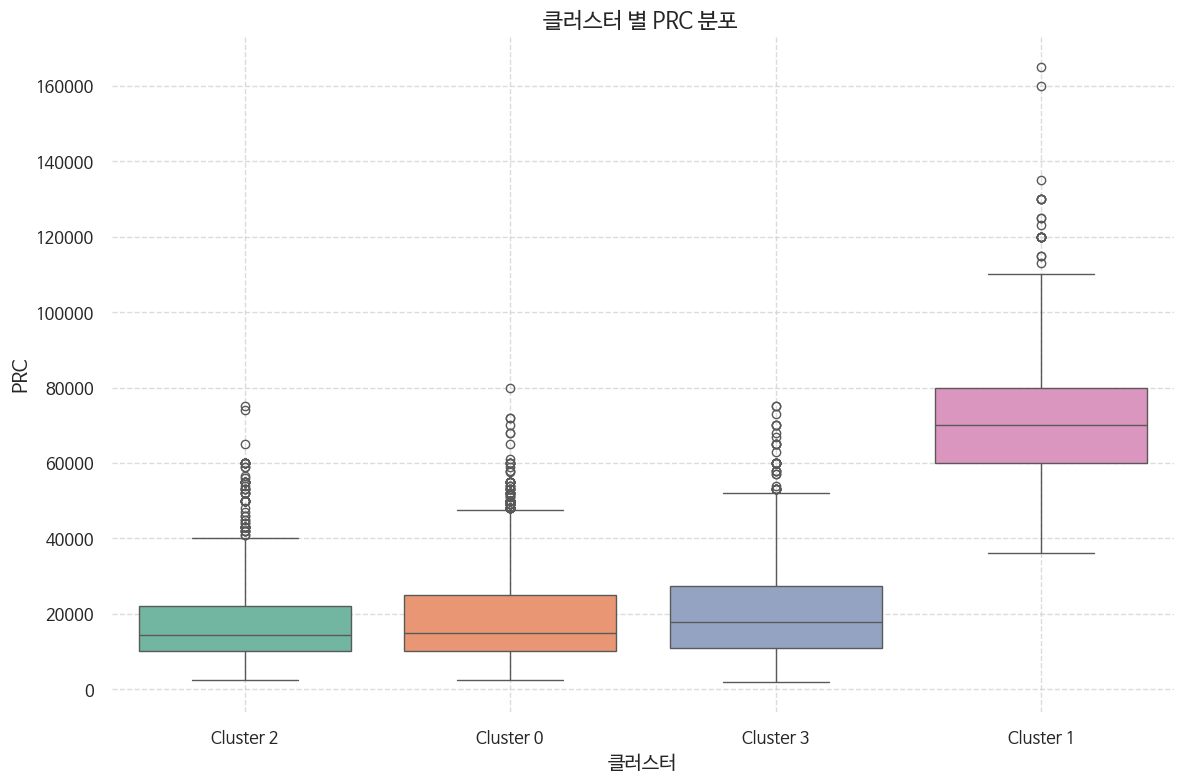

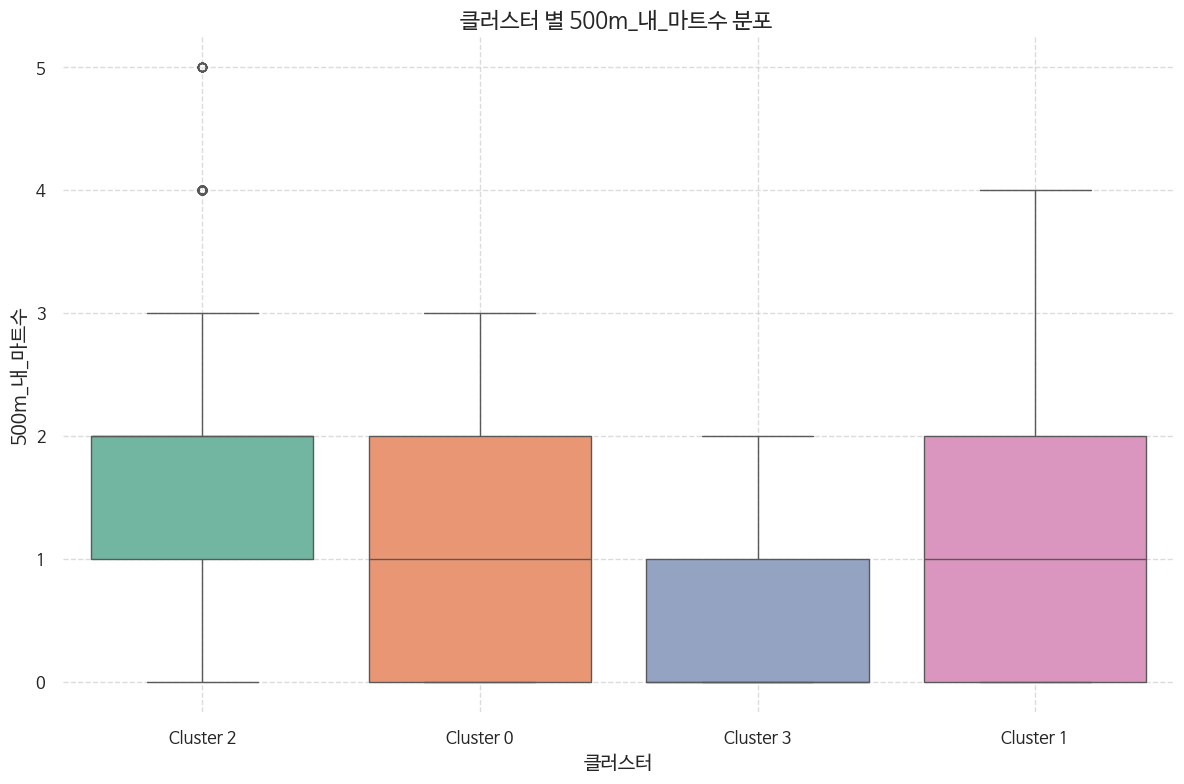

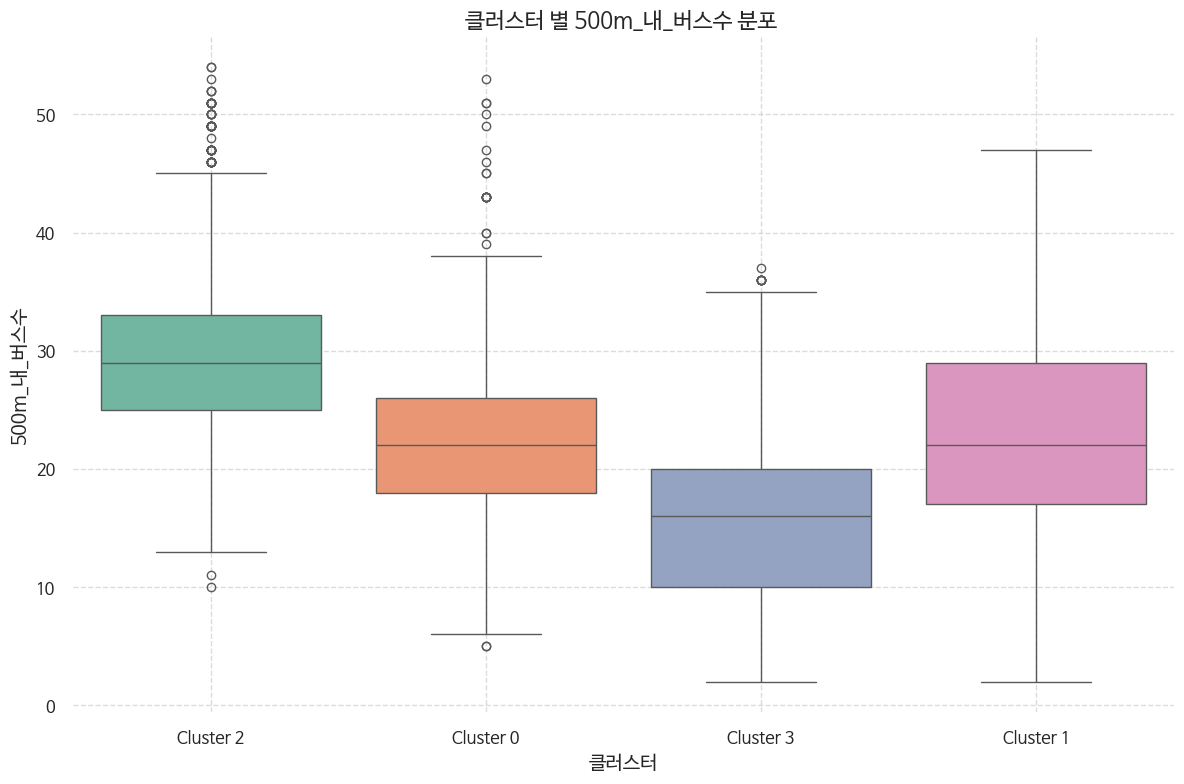

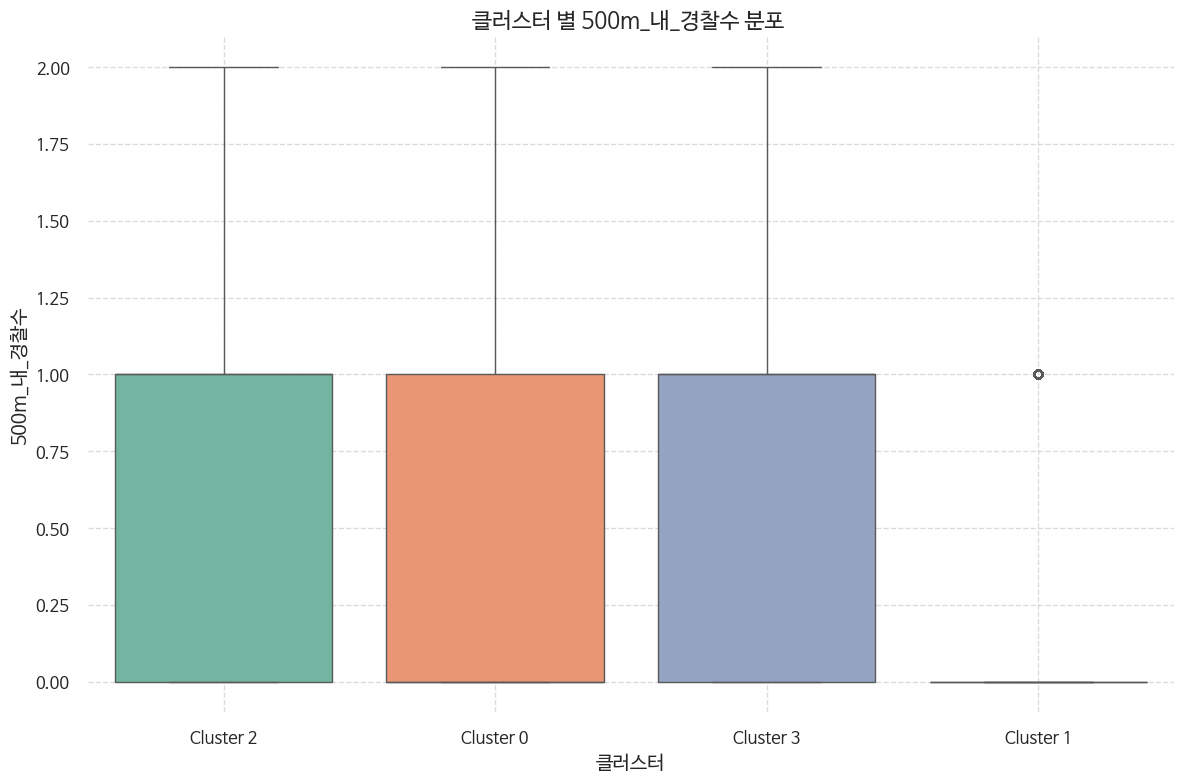

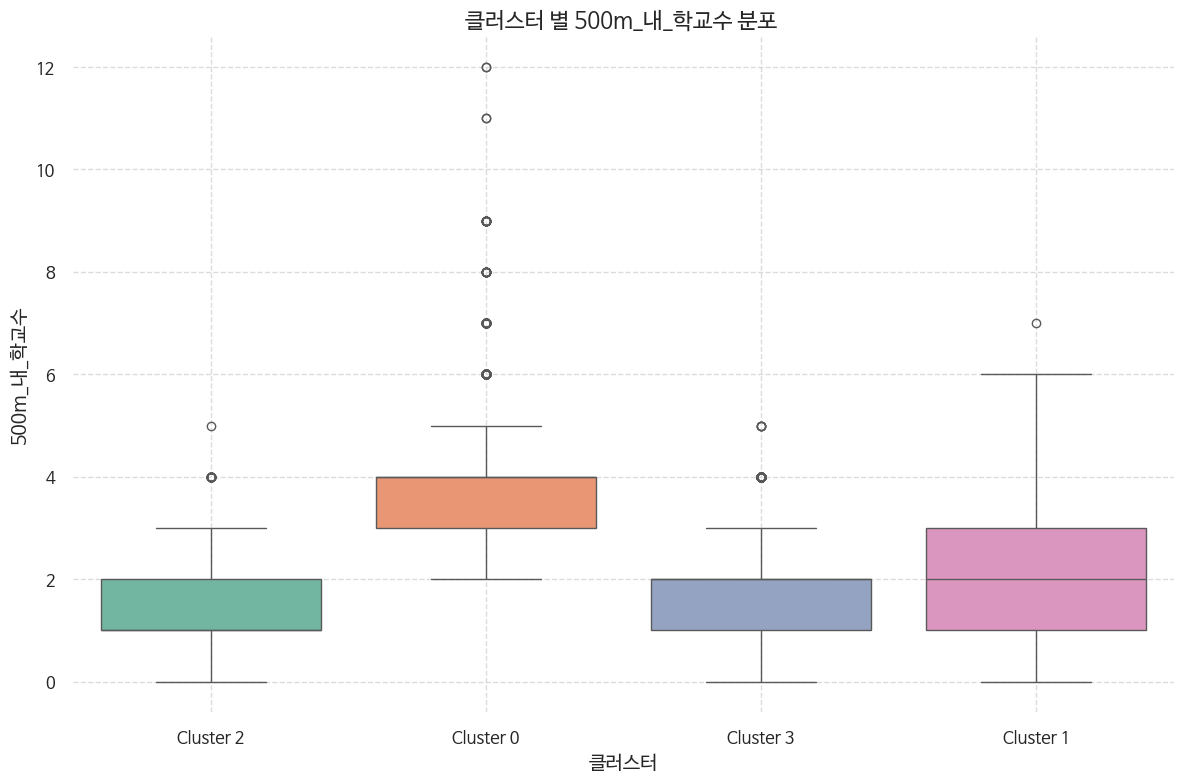

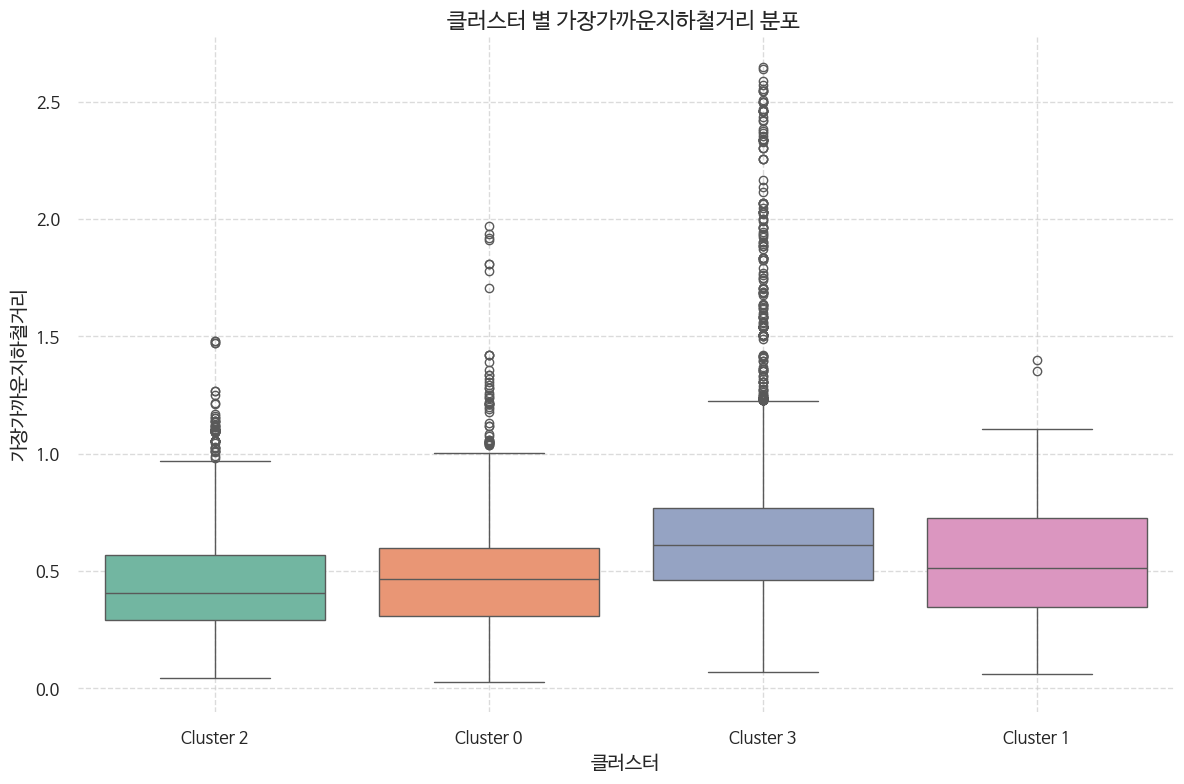

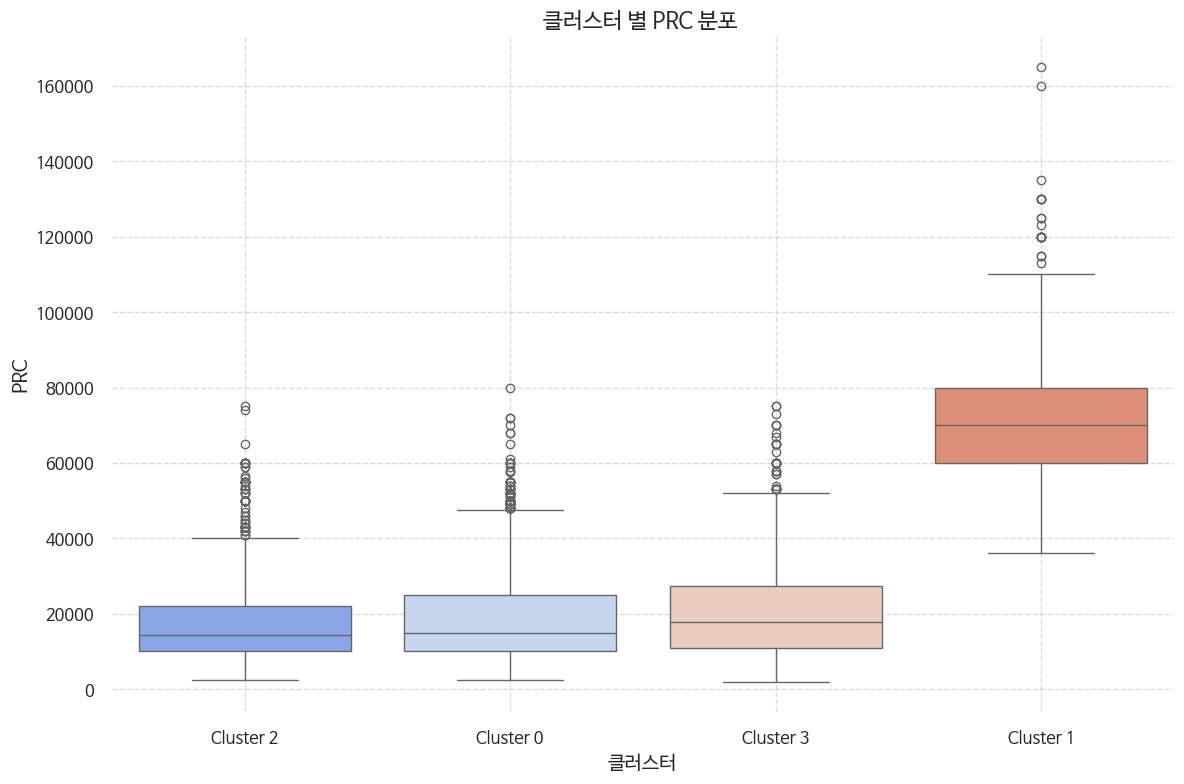

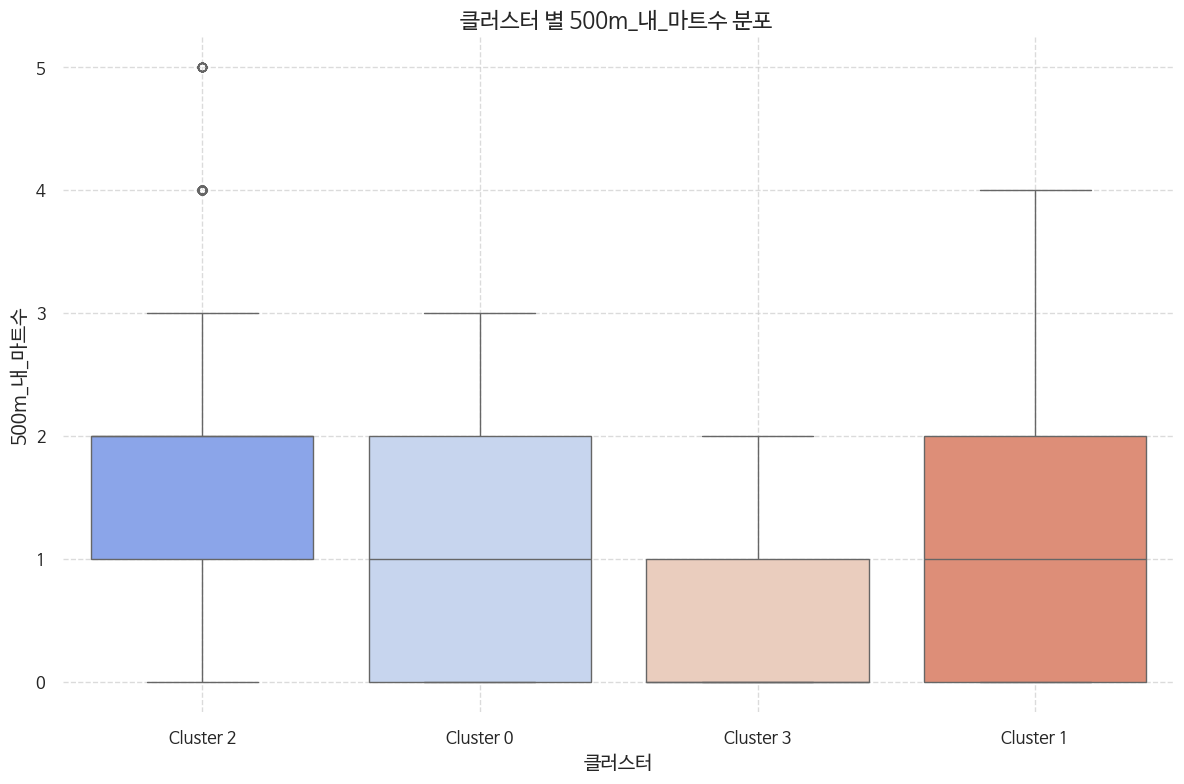

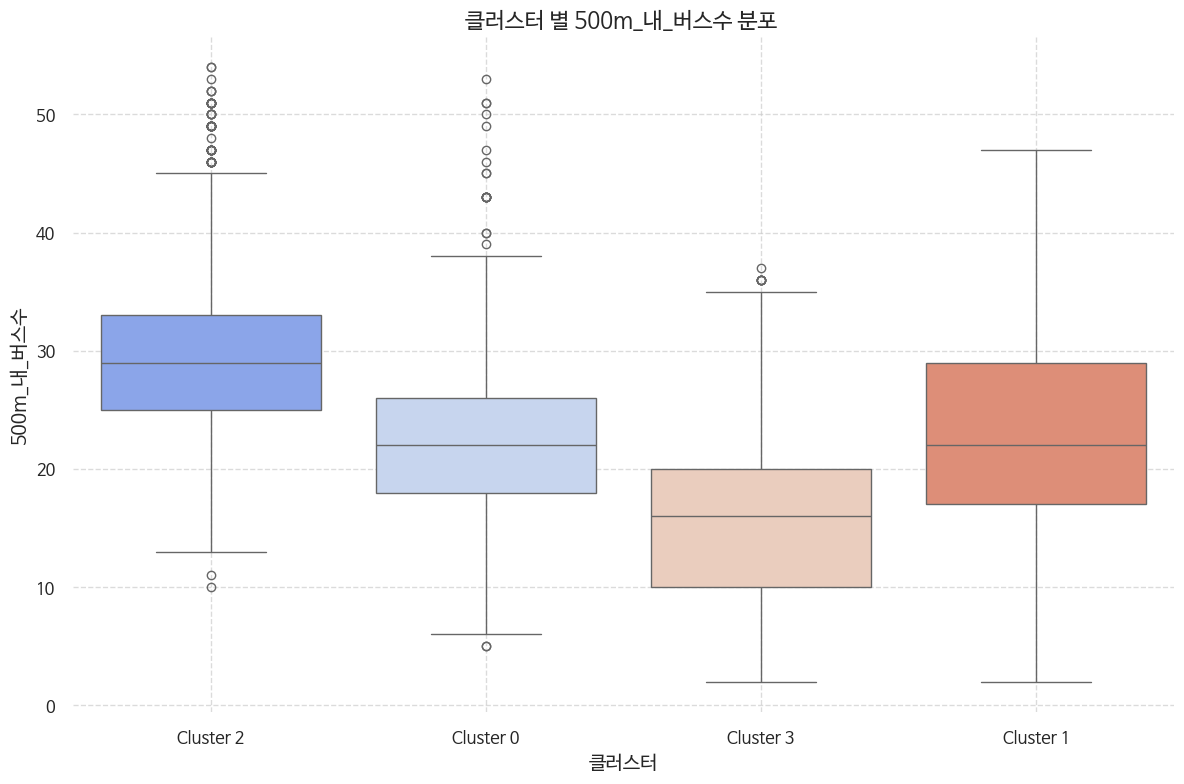

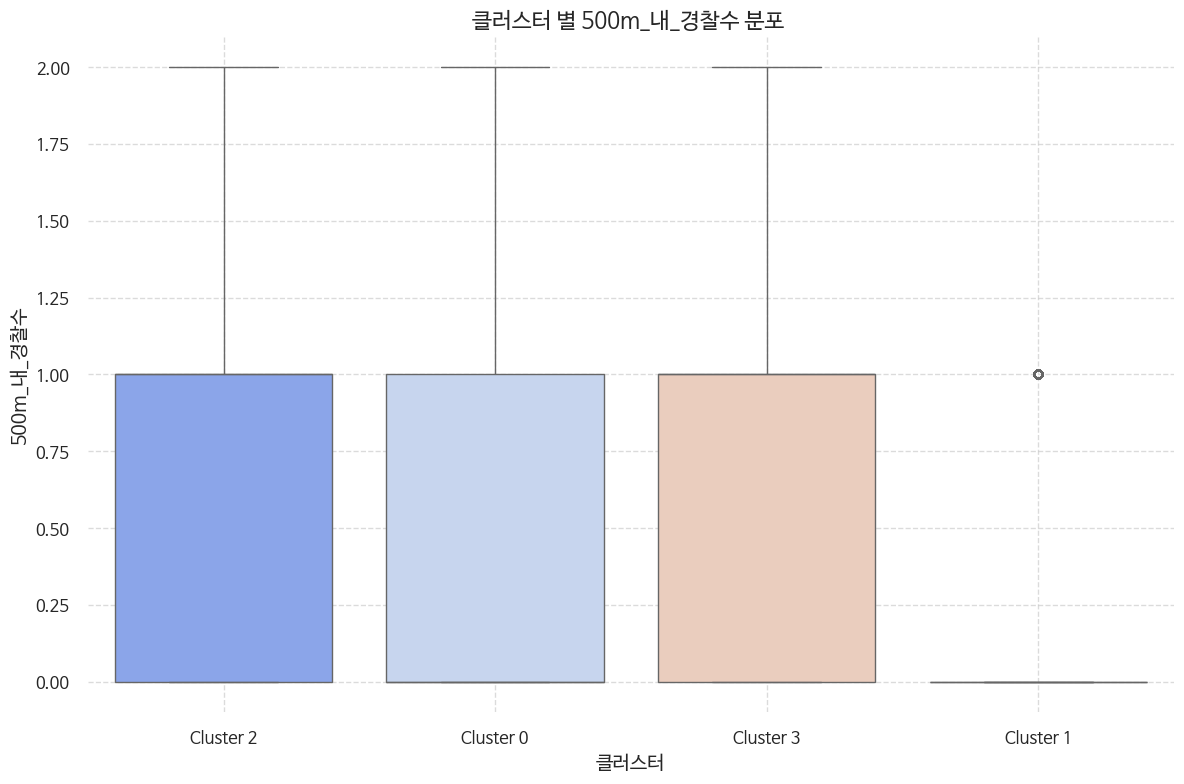

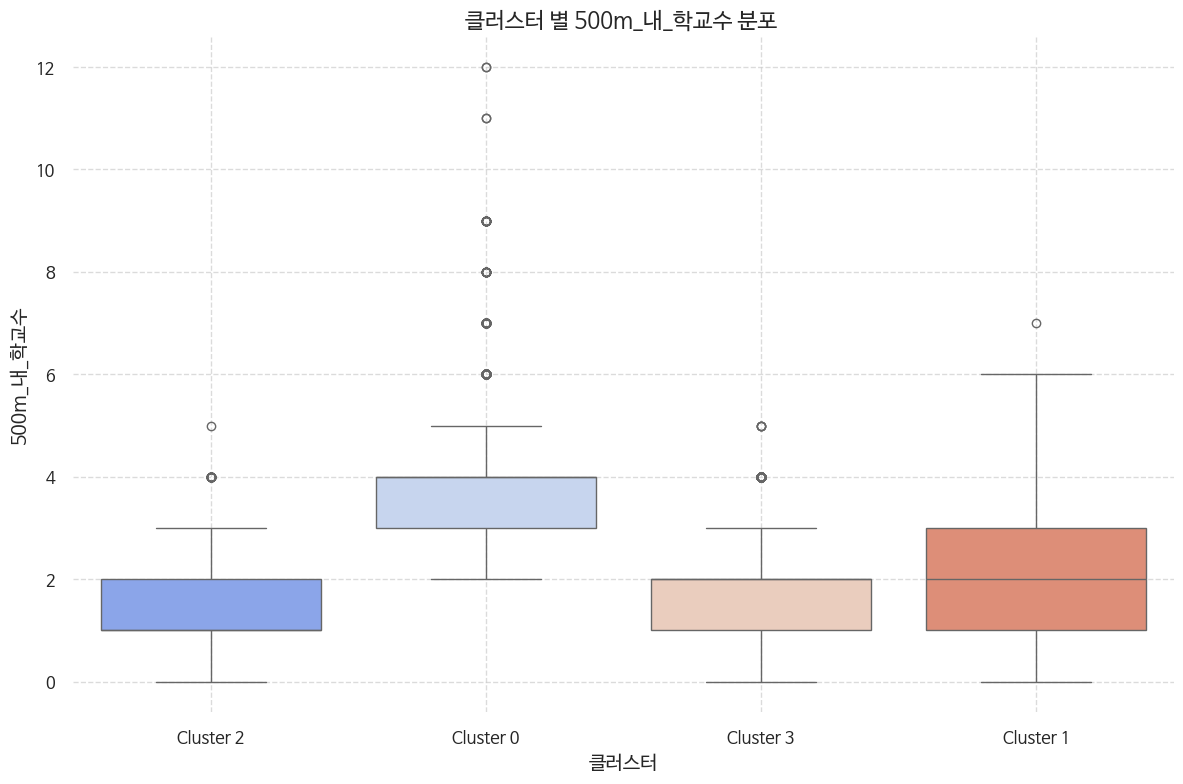

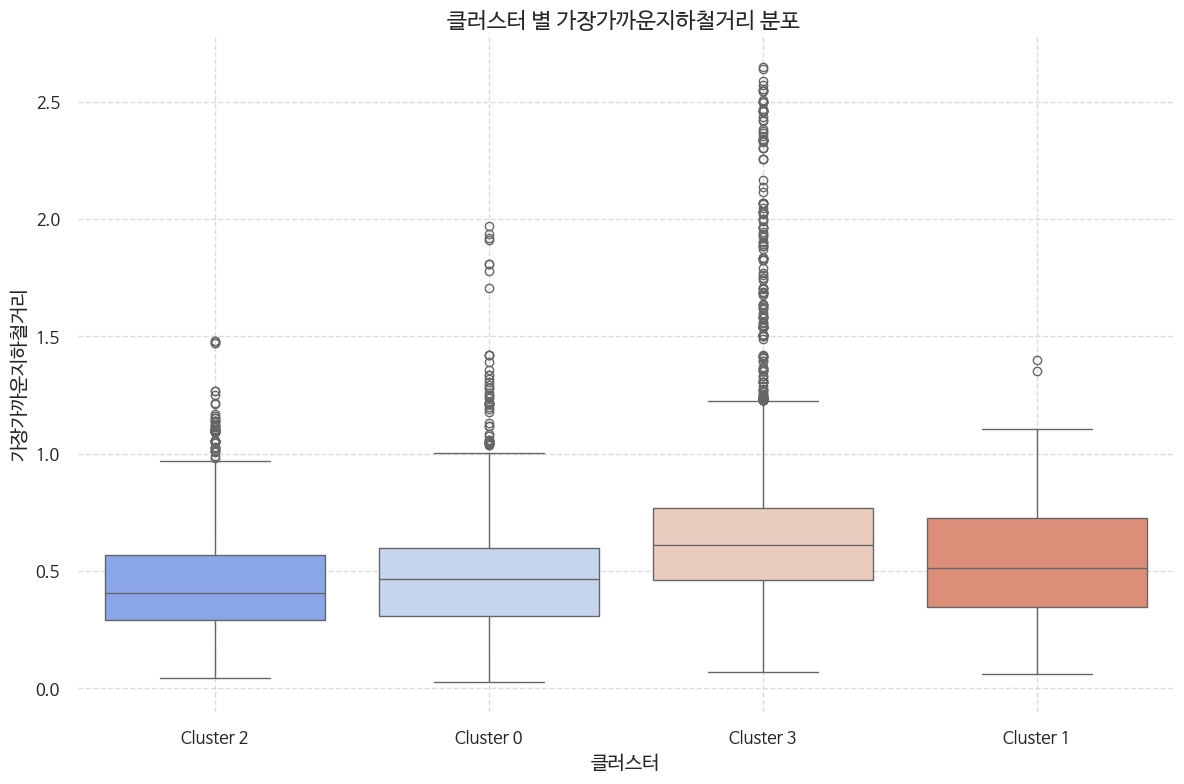

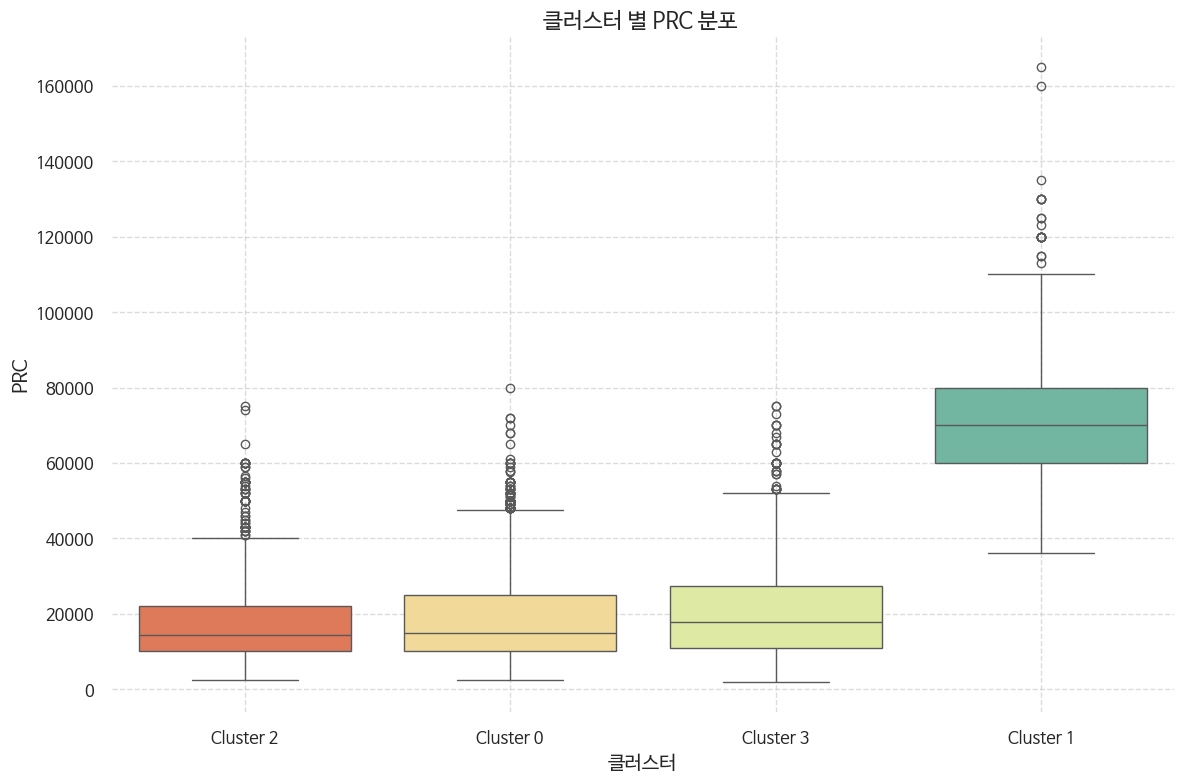

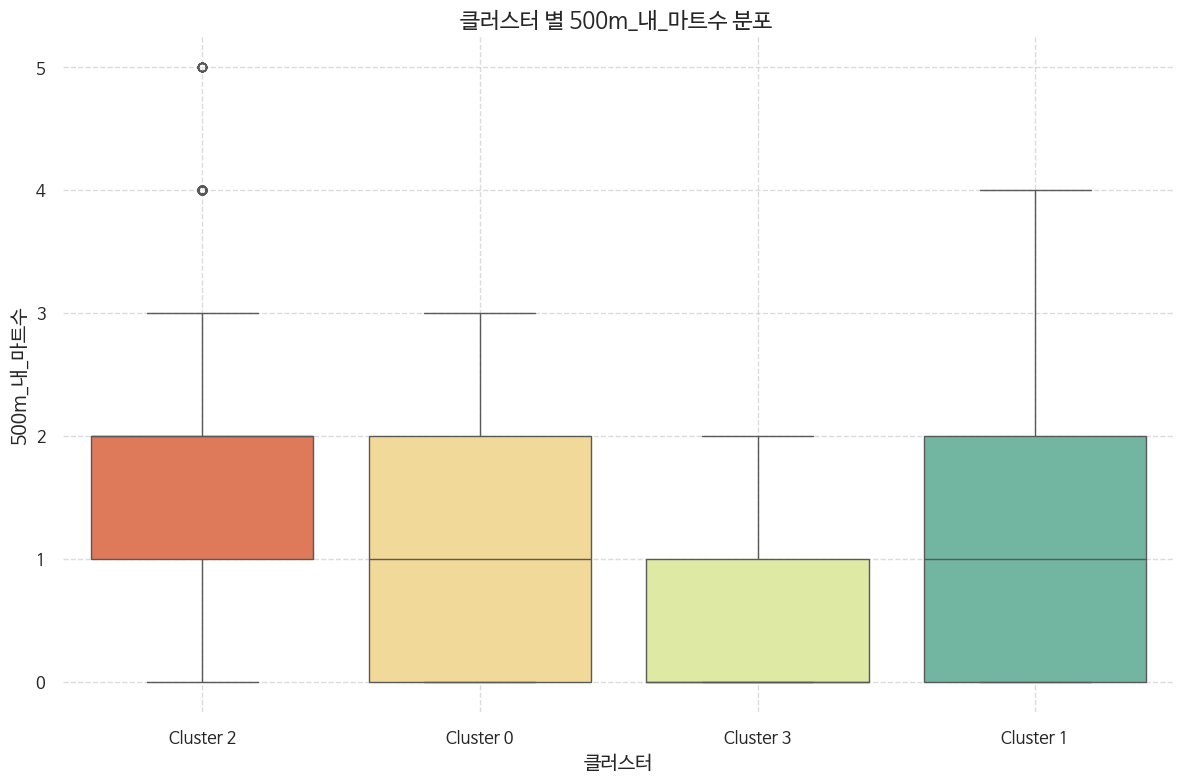

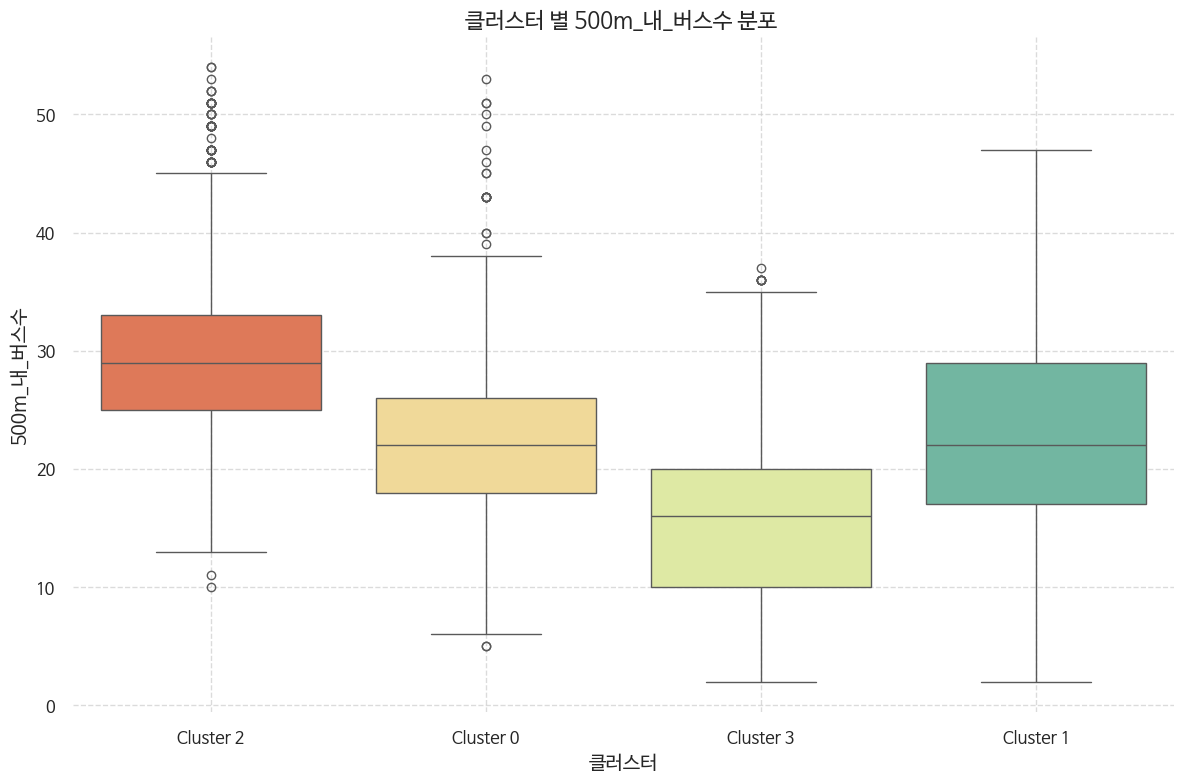

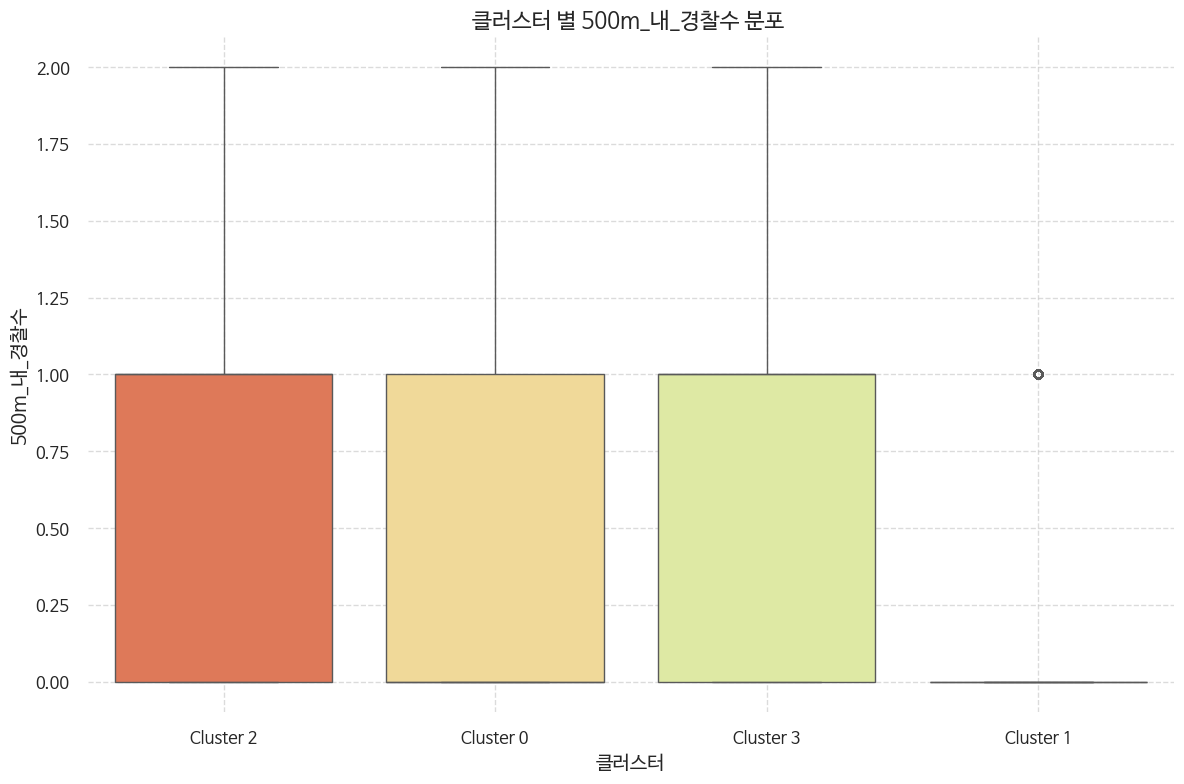

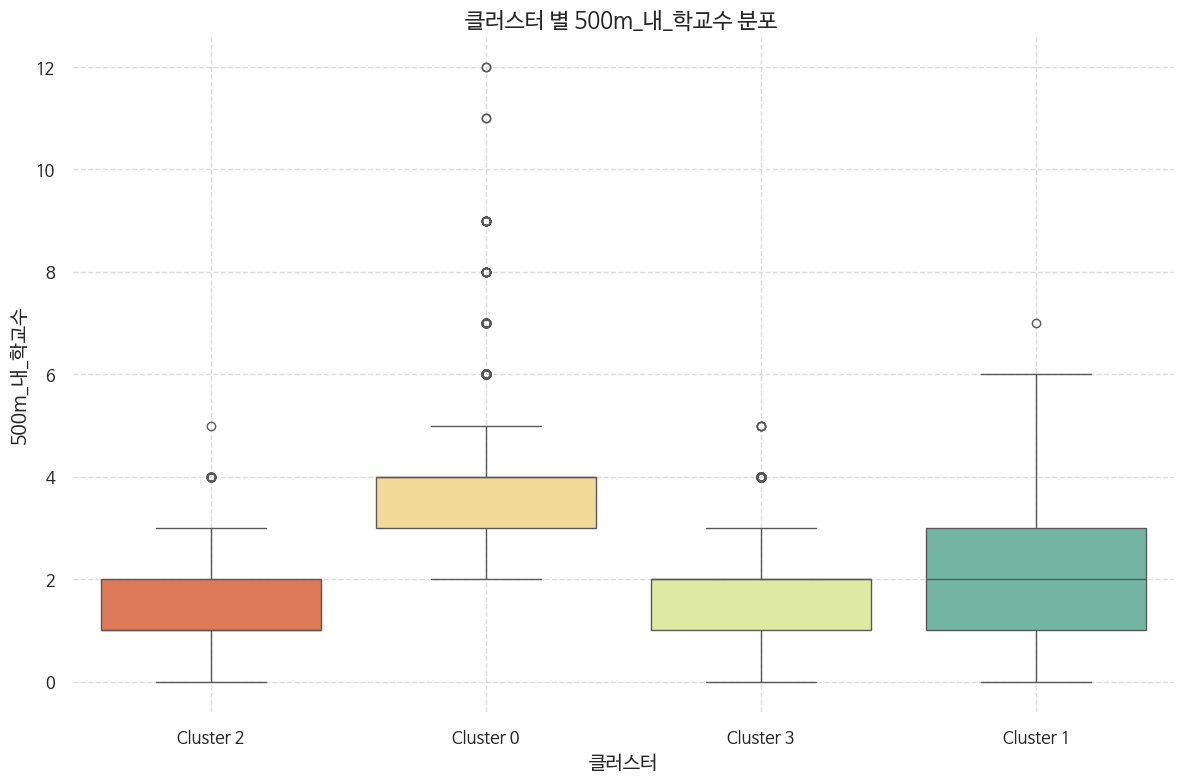

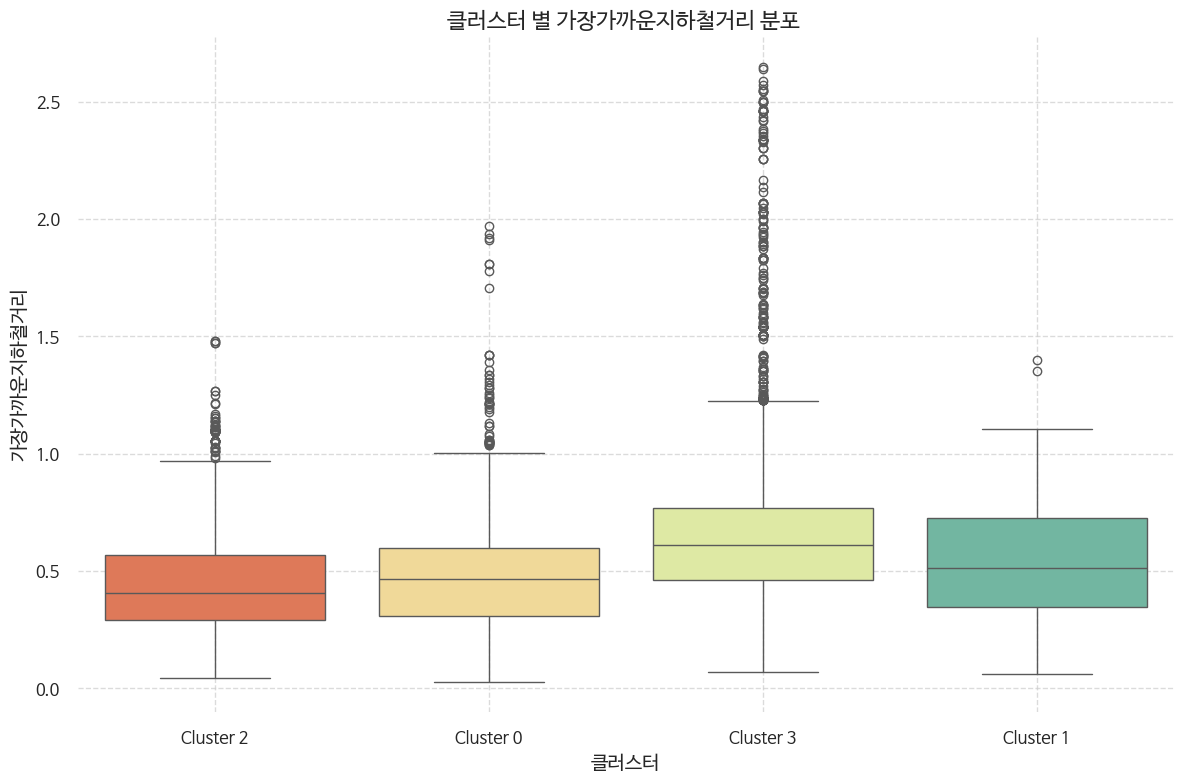

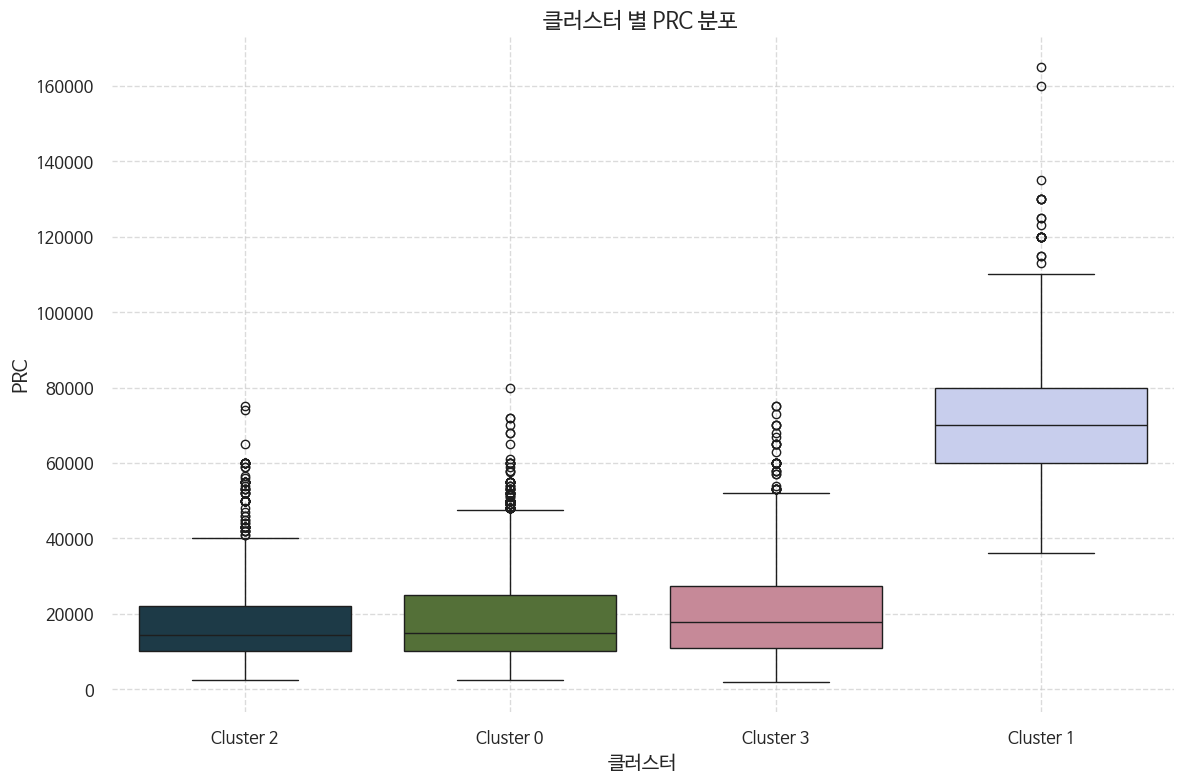

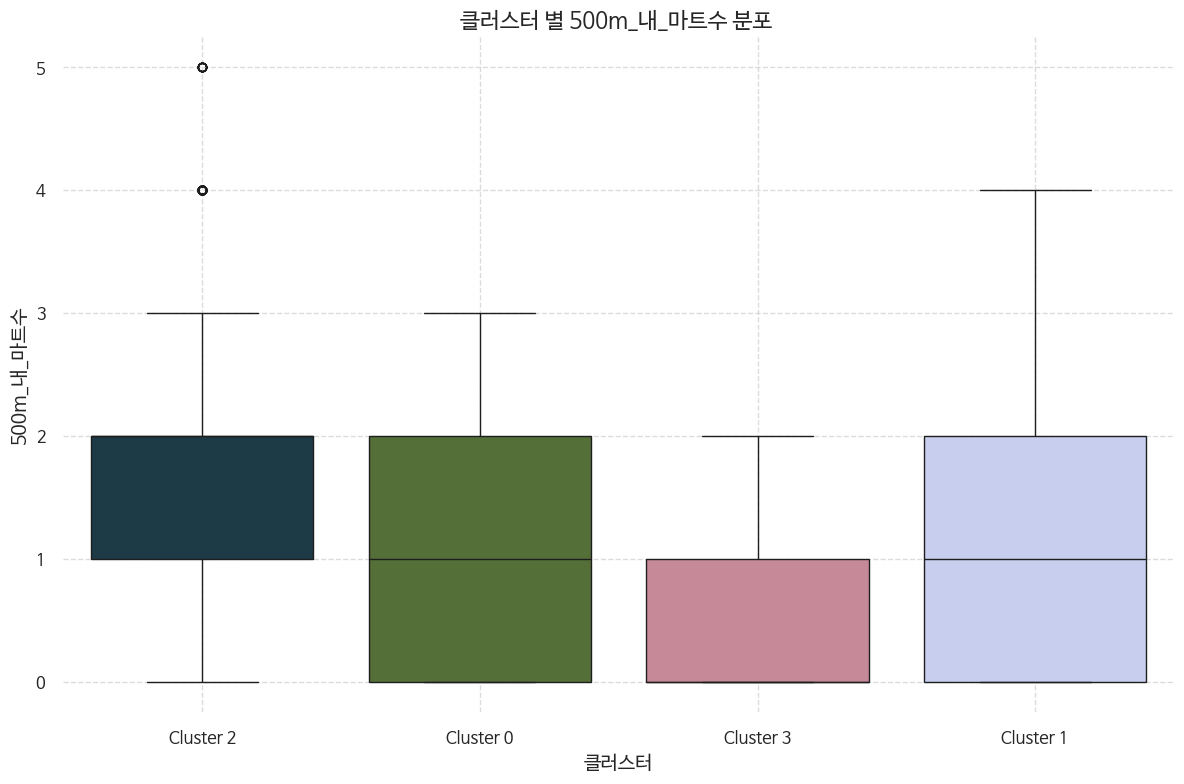

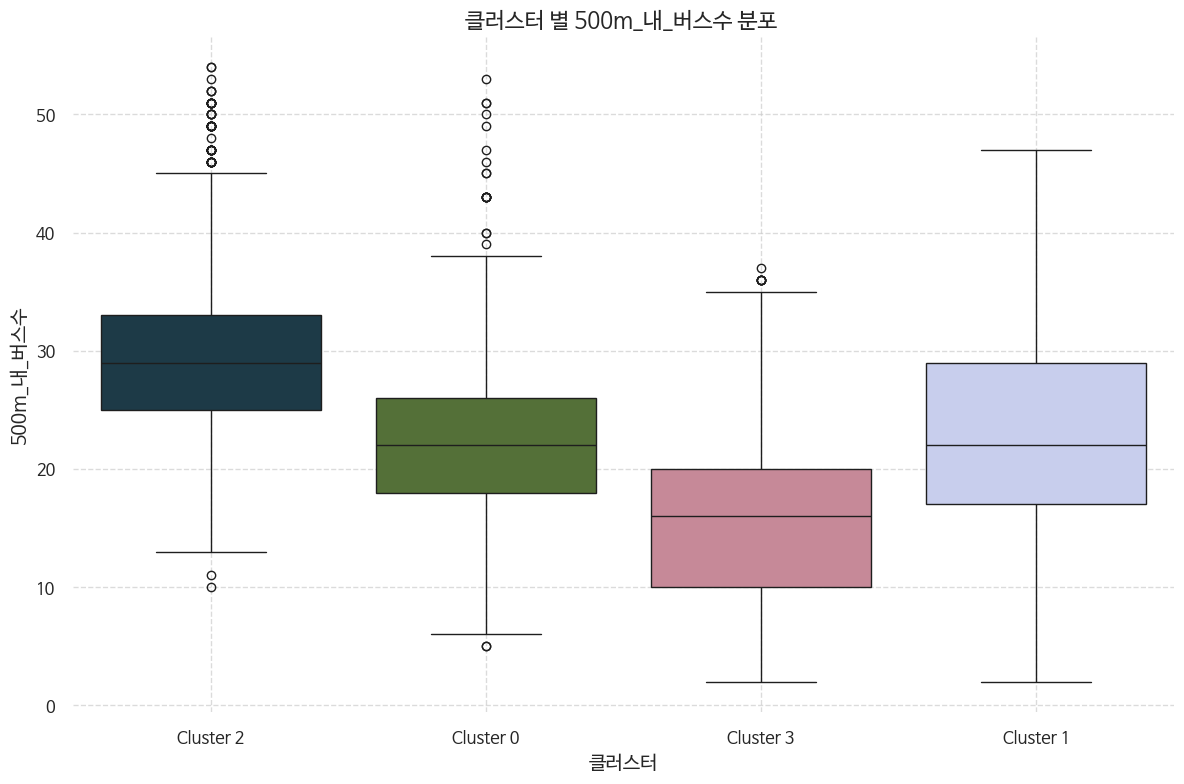

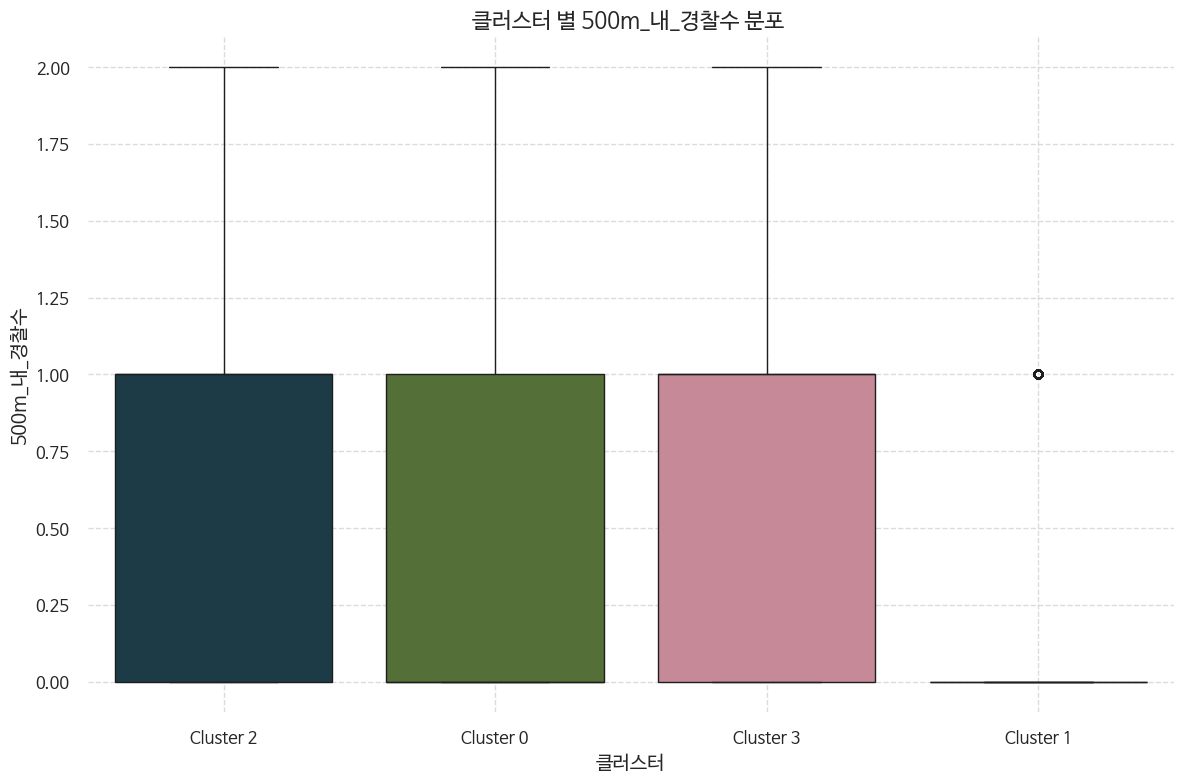

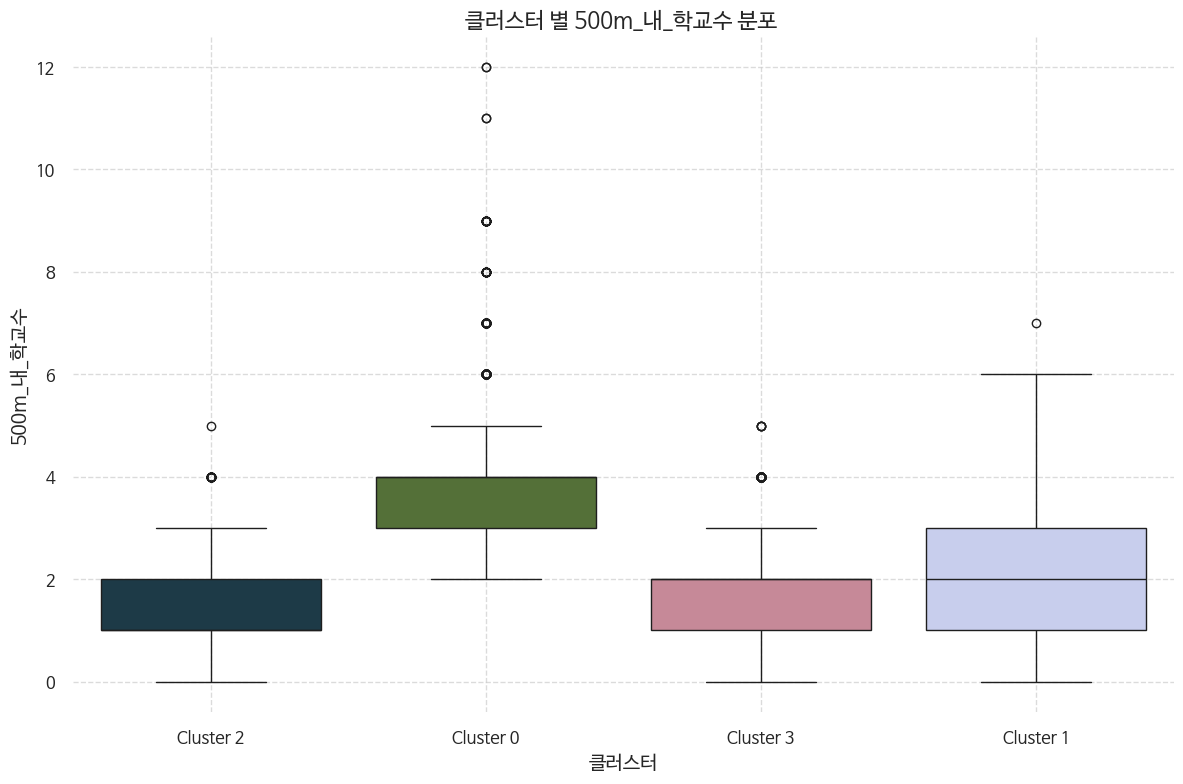

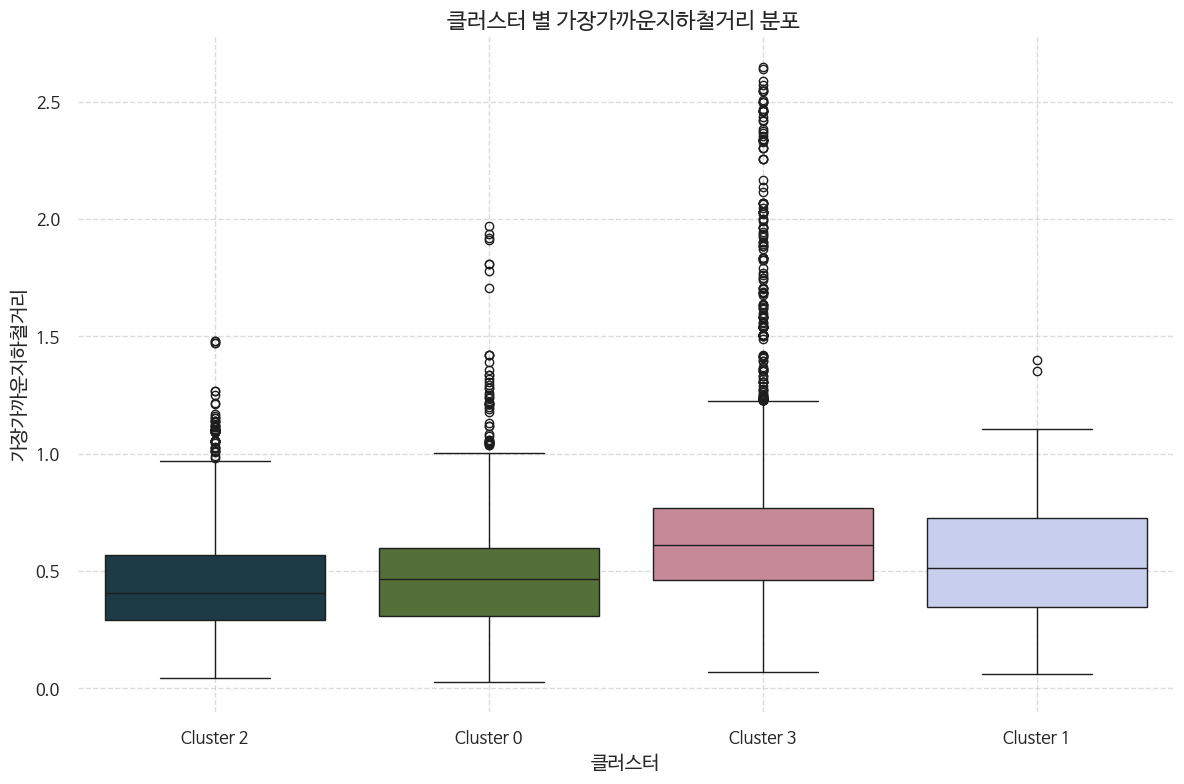

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 색상 팔레트 선택
palettes = ["Set2", "coolwarm", "Spectral", "cubehelix"]

variables = ['PRC', '500m_내_마트수', '500m_내_버스수', '500m_내_경찰수', '500m_내_학교수', '가장가까운지하철거리']

for palette in palettes:
    for var in variables:
        plt.figure(figsize=(12, 8))
        plt.rc('font', family='NanumBarunGothic')
        sns.boxplot(x='Cluster', y=var, data=clustered_data, palette=palette)
        plt.title(f'클러스터 별 {var} 분포 ', fontsize=16)
        plt.xlabel('클러스터', fontsize=14)
        plt.ylabel(var, fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.box(False)
        plt.tight_layout()
        plt.show()


In [ ]:
clustered_1.describe()

,PRC,500m_내_마트수,500m_내_버스수,500m_내_경찰수,500m_내_학교수,가장가까운지하철거리
count,1182.00000,1182.00000,1182.00000,1182.00000,1182.00000,1182.00000
mean,70676.15905,1.07783,22.93147,0.20389,2.04822,0.53146
std,17416.99056,0.84779,8.41903,0.40306,1.19349,0.24098
min,36000.00000,0.00000,2.00000,0.00000,0.00000,0.06176
25%,60000.00000,0.00000,17.00000,0.00000,1.00000,0.34567
50%,70000.00000,1.00000,22.00000,0.00000,2.00000,0.51209
75%,80000.00000,2.00000,29.00000,0.00000,3.00000,0.72624
max,165000.00000,4.00000,47.00000,1.00000,7.00000,1.40101


from matplotlib import pyplot as plt
_df_0['PRC'].plot(kind='hist', bins=20, title='PRC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['500m_내_마트수'].plot(kind='hist', bins=20, title='500m_내_마트수')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['500m_내_버스수'].plot(kind='hist', bins=20, title='500m_내_버스수')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['500m_내_경찰수'].plot(kind='hist', bins=20, title='500m_내_경찰수')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PRC', y='500m_내_마트수', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='500m_내_마트수', y='500m_내_버스수', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='500m_내_버스수', y='500m_내_경찰수', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='500m_내_경찰수', y='500m_내_학교수', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['PRC'].plot(kind='line', figsize=(8, 4), title='PRC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['500m_내_마트수'].plot(kind='line', figsize=(8, 4), title='500m_내_마트수')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['500m_내_버스수'].plot(kind='line', figsize=(8, 4), title='500m_내_버스수')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['500m_내_경찰수'].plot(kind='line', figsize=(8, 4), title='500m_내_경찰수')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
clustered_2.describe()

,PRC,500m_내_마트수,500m_내_버스수,500m_내_경찰수,500m_내_학교수,가장가까운지하철거리
count,2123.00000,2123.00000,2123.00000,2123.00000,2123.00000,2123.00000
mean,17269.64060,1.87423,29.14319,0.72916,1.41309,0.44732
std,10423.38751,0.80860,7.28226,0.77522,0.90102,0.22198
min,2500.00000,0.00000,10.00000,0.00000,0.00000,0.04346
25%,10000.00000,1.00000,25.00000,0.00000,1.00000,0.29317
50%,14500.00000,2.00000,29.00000,1.00000,1.00000,0.40662
75%,22000.00000,2.00000,33.00000,1.00000,2.00000,0.56638
max,75000.00000,5.00000,54.00000,2.00000,5.00000,1.47839


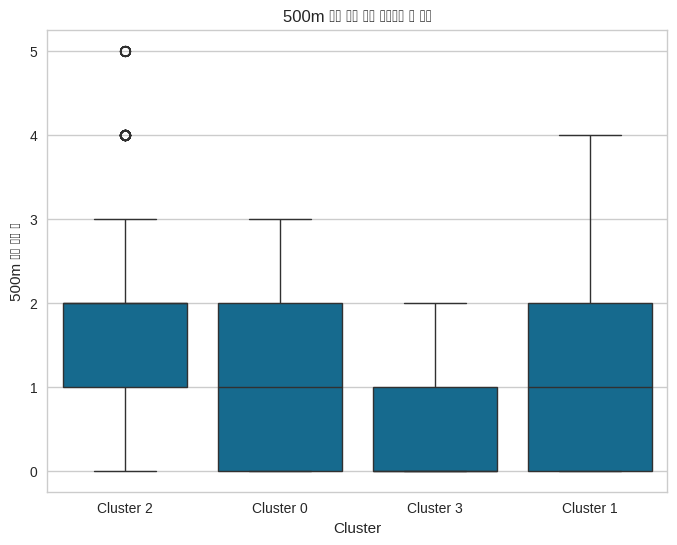

In [ ]:
# 500m 내 마트 수에 대한 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='500m_내_마트수', data=clustered_data)
plt.title('500m 이내 마트 수의 클러스터 별 분포')
plt.xlabel('Cluster')
plt.ylabel('500m 이내 마트 수')
plt.show()


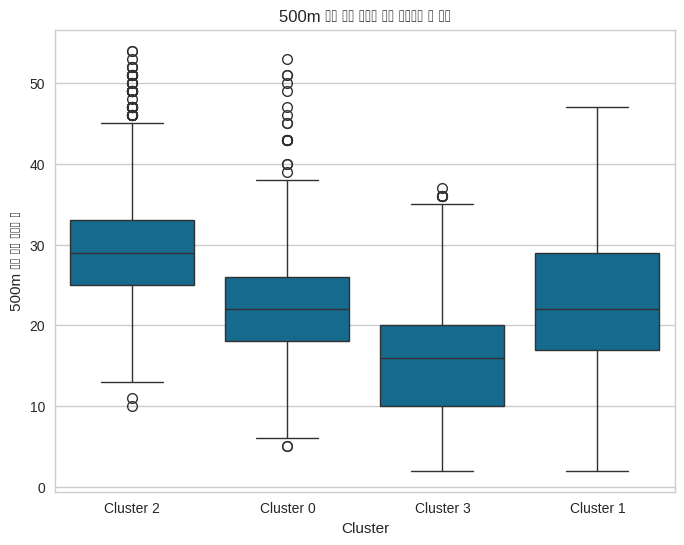

In [ ]:
# 500m 내 버스 수에 대한 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='500m_내_버스수', data=clustered_data)
plt.title('500m 이내 버스 정류장 수의 클러스터 별 분포')
plt.xlabel('Cluster')
plt.ylabel('500m 이내 버스 정류장 수')
plt.show()


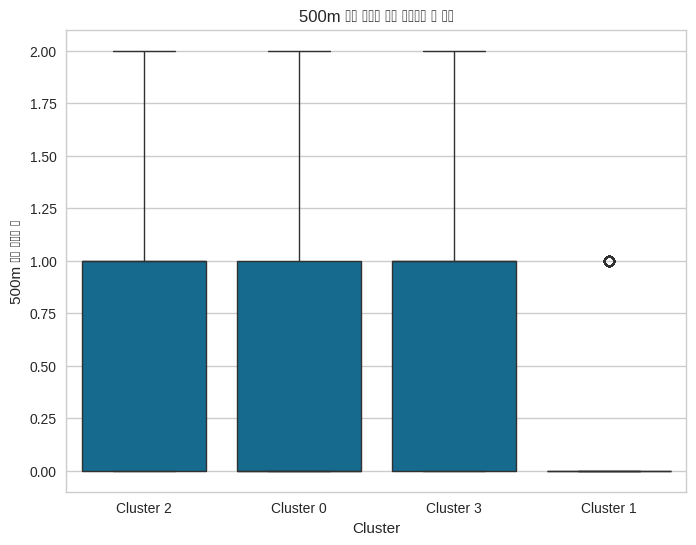

In [ ]:
# 500m 내 경찰 수에 대한 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='500m_내_경찰수', data=clustered_data)
plt.title('500m 이내 경찰서 수의 클러스터 별 분포')
plt.xlabel('Cluster')
plt.ylabel('500m 이내 경찰서 수')
plt.show()


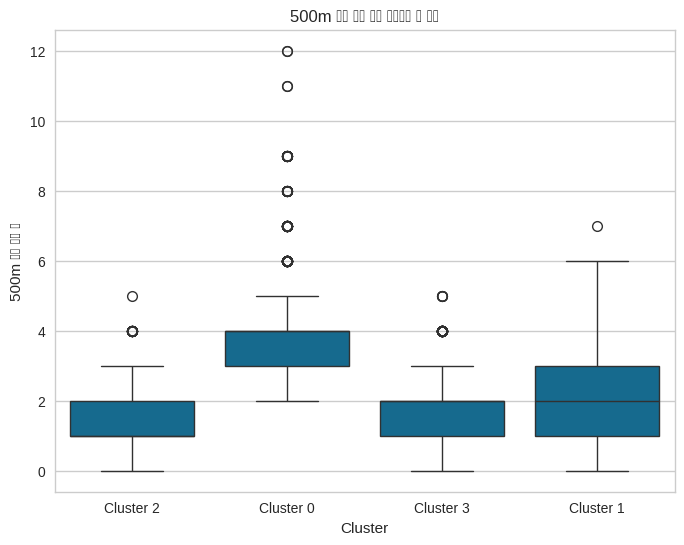

In [ ]:
# 500m 내 학교 수에 대한 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='500m_내_학교수', data=clustered_data)
plt.title('500m 이내 학교 수의 클러스터 별 분포')
plt.xlabel('Cluster')
plt.ylabel('500m 이내 학교 수')
plt.show()


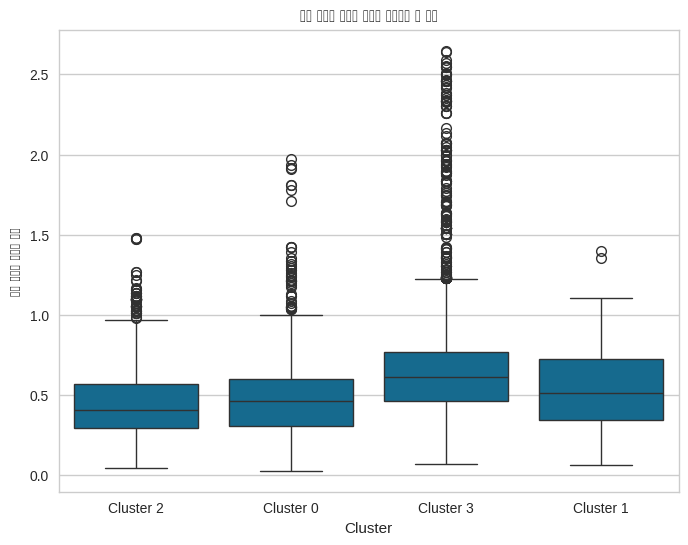

In [ ]:
# 가장 가까운 지하철 거리에 대한 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='가장가까운지하철거리', data=clustered_data)
plt.title('가장 가까운 지하철 거리의 클러스터 별 분포')
plt.xlabel('Cluster')
plt.ylabel('가장 가까운 지하철 거리')
plt.show()


In [ ]:
clustered_2 #버스정류장 개많음

,PRC,500m_내_마트수,500m_내_버스수,500m_내_경찰수,500m_내_학교수,가장가까운지하철거리,Cluster
0,7500,2,23,2,4,0.35000,Cluster 2
1,28000,2,15,0,0,0.16456,Cluster 2
2,30000,2,15,0,0,0.16456,Cluster 2
3,21000,3,13,1,0,0.55283,Cluster 2
4,21000,3,13,1,0,0.55283,Cluster 2
...,...,...,...,...,...,...,...
7404,18000,1,39,0,1,0.94499,Cluster 2
7405,8000,2,37,0,1,0.68033,Cluster 2
7406,6000,1,25,0,1,0.32158,Cluster 2
7410,6000,1,31,1,1,0.37277,Cluster 2


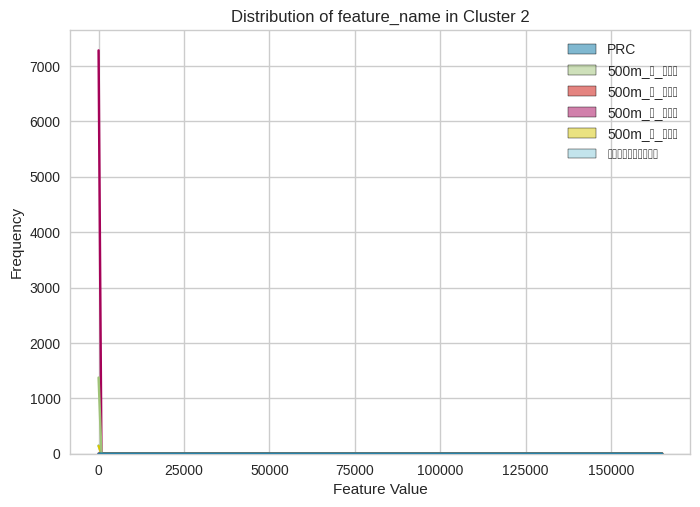

In [ ]:
sns.histplot(clustered_1, kde=True)
plt.title('Distribution of feature_name in Cluster 1')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
clustered_data['Cluster']

,PRC,500m_내_마트수,500m_내_버스수,500m_내_경찰수,500m_내_학교수,가장가까운지하철거리,Cluster
0,7500,2,23,2,4,0.350000,Cluster 2
1,28000,2,15,0,0,0.164562,Cluster 5
2,30000,2,15,0,0,0.164562,Cluster 5
3,21000,3,13,1,0,0.552826,Cluster 2
4,21000,3,13,1,0,0.552826,Cluster 2
...,...,...,...,...,...,...,...
7417,38900,0,19,1,2,0.404347,Cluster 3
7418,15000,0,18,1,2,0.288080,Cluster 3
7419,110000,0,22,0,1,0.913276,Cluster 1
7420,110000,0,22,0,1,0.913276,Cluster 1


In [ ]:
clustered_data["Cluster"][0]

'Cluster 2'

In [ ]:
out_df["ATCLNO"].values.tolist()

[2430671984,
 2434097865,
 2430976149,
 2432400350,
 2433977436,
 2432622833,
 2434236321,
 2429895379,
 2432208321,
 2433071424]

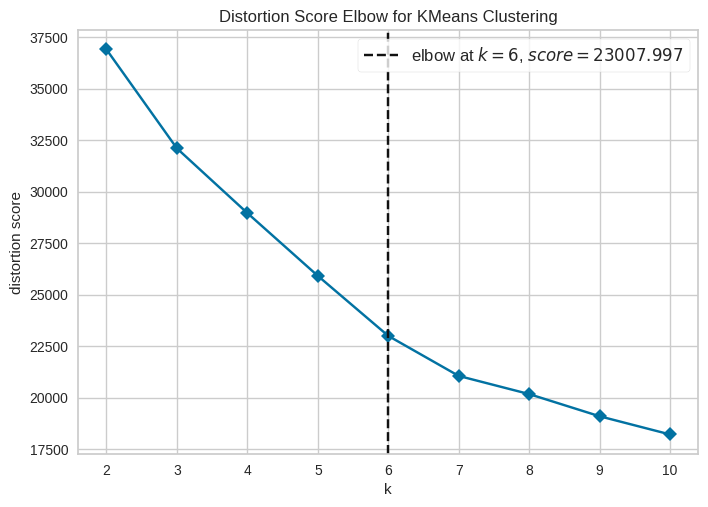

In [ ]:
plot_model(loaded_model, plot='elbow')

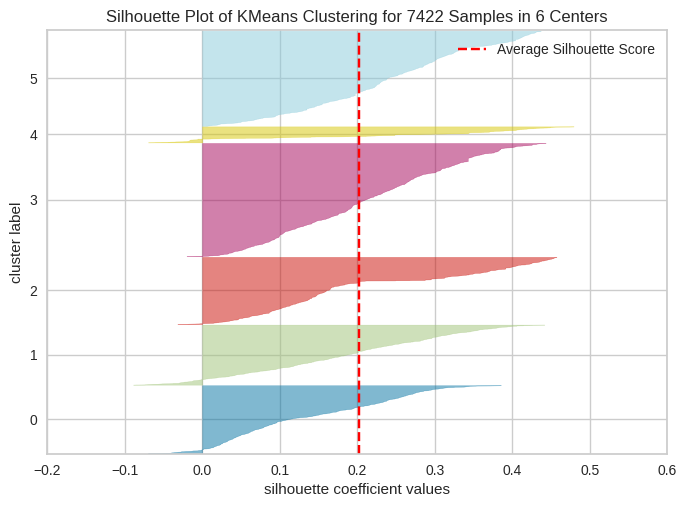

In [ ]:
plot_model(loaded_model, plot='silhouette')

In [ ]:
out_df

,index,PRC,500m_내_마트수,500m_내_버스수,500m_내_경찰수,500m_내_학교수,가장가까운지하철거리,Cluster,ATCLNO,동
1855,6499,7000,2,41,1,1,0.874238,Cluster 2,2430671984,화곡동
572,2478,6000,2,44,1,4,0.868341,Cluster 2,2434097865,화곡동
11,14,5000,2,24,0,2,0.774551,Cluster 2,2430976149,화곡동
1896,6550,7000,2,33,1,0,0.737630,Cluster 2,2432400350,화곡동
1003,3894,6500,2,29,2,0,0.661407,Cluster 2,2433977436,화곡동
...,...,...,...,...,...,...,...,...,...,...
2039,7100,8000,0,32,1,2,0.211046,Cluster 2,2434664502,화곡동
1734,6175,6000,2,25,1,2,0.171281,Cluster 2,2434166813,화곡동
1569,5635,8000,2,17,0,1,0.169833,Cluster 2,2434207830,화곡동
77,211,4000,2,13,0,1,0.138526,Cluster 2,2431965446,화곡동


In [ ]:
out_df["ATCLNO"].to_json(orient='records')

'[2430671984,2434097865,2430976149,2432400350,2433977436,2432622833,2434236321,2429895379,2432208321,2433071424,2433801871,2432362286,2433732047,2434302716,2433794716,2433537063,2434666426,2431546987,2431346363,2434461669,2433705925,2434542401,2433670894,2433609668,2432843347,2430757043,2431970183,2434470776,2429666842,2434197284,2433874717,2429553788,2431160924,2431167433,2432117694,2433977506,2431988628,2431717756,2430652332,2430362732,2433092000,2433135854,2434202687,2433521239,2433562042,2431997176,2431938948,2430542002,2429470286,2431661147,2430063245,2432896980,2432245491,2433472522,2432433687,2432080463,2431270056,2434664502,2434166813,2434207830,2431965446,2433614604]'

In [ ]:
import json
import pandas as pd
import pickle
from pycaret.clustering import *

# 모델 로드
with open('kmeans_model_3.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# 로드된 모델 사용
print(loaded_model)

train_df=pd.read_csv("jonse_data.csv")

sampleJson = '{"dongName":"화곡동", "policeOffice":"3","subway":"3", "school":"2", "mart":"2", "bus":"2", "price":"7500"}'
sampleData= json.loads(sampleJson)


police = {"1":0,"2":1,"3":2}
school = {"1":2,"2":4,"3":6}
mart={"1":1,"2":2,"3":3}
subway={"1":0.72,"2":0.5,"3":0.35}
bus={"1":16,"2":23,"3":30}

police_data = police[sampleData["policeOffice"]]
school_data = school[sampleData["school"]]
subway_data = subway[sampleData["subway"]]
mart_data = mart[sampleData["mart"]]
dong_data = sampleData["dongName"]
price=int(sampleData["price"])
bus_data = bus[sampleData["bus"]]

columns = ['ATCLNO', '동', 'PRC', '500m_내_마트수', '500m_내_버스수','500m_내_경찰수', '500m_내_학교수', '가장가까운지하철거리']
data=[["1", dong_data, price, mart_data, bus_data, police_data, school_data, subway_data]]
input_df = pd.DataFrame(data, columns=columns)

clust_df=pd.concat([input_df, train_df]).reset_index(drop=True)

clustering_setup = setup(data=clust_df,
                         normalize=True,
                         ignore_features=['ATCLNO', '동'],
                         session_id=123)
clustered_data = assign_model(loaded_model)


out_df = clustered_data[clustered_data["Cluster"] == clustered_data["Cluster"][0]].reset_index()

out_df=out_df[1:]
out_df['index'] = out_df['index'] - 1
out_df.head()

out_df["ATCLNO"] = train_df["ATCLNO"]
out_df["동"] = train_df["동"]

# 동 필터링
out_df = out_df[out_df["동"] == dong_data]

# price 필터링
out_df = out_df[out_df["PRC"] < (price * 1.2)]

# 정렬
if sampleData["policeOffice"] == "3" :
  out_df.sort_values(by=["500m_내_경찰수"], inplace=True)
if sampleData["school"] == "3" :
  out_df.sort_values(by=["500m_내_학교수"], inplace=True)
if sampleData["subway"] == "3" :
  out_df.sort_values(by=["가장가까운지하철거리"], ascending=False, inplace=True)
if sampleData["bus"] == "3" :
  out_df.sort_values(by=["500m_내_버스수"], inplace=True)
if sampleData["mart"] == "3" :
  out_df.sort_values(by=["500m_내_마트수"], inplace=True)

# json 변경
json_data = out_df["ATCLNO"].to_json(orient='records')

print(json_data)

FileNotFoundError: [Errno 2] No such file or directory: 'kmeans_model_3.pkl'

In [ ]:
import json
import pandas as pd
import pickle
from pycaret.clustering import *
import sys


if __name__ == "__main__":
  try:
    # 모델 로드

    with open('kmeans_model_2.pkl', 'rb') as file:
      loaded_model = pickle.load(file)

    # 로드된 모델 사용
    print(loaded_model)

    train_df=pd.read_csv("jonse_data.csv")

    json_data_str = sys.stdin.read()

    #sampleJson = '{"dongName":"화곡동", "policeOffice":"3","subway":"3", "school":"2", "mart":"2", "bus":"2", "price":"7500"}'
    sampleData= json.loads(json_data_str)
    print(sampleJson)


    police = {"1":0,"2":1,"3":2}
    school = {"1":2,"2":4,"3":6}
    mart={"1":1,"2":2,"3":3}
    subway={"1":0.72,"2":0.5,"3":0.35}
    bus={"1":16,"2":23,"3":30}

    police_data = police[sampleData["policeOffice"]]
    school_data = school[sampleData["school"]]
    subway_data = subway[sampleData["subway"]]
    mart_data = mart[sampleData["mart"]]
    dong_data = sampleData["dongName"]
    price=int(sampleData["price"])
    bus_data = bus[sampleData["bus"]]

    columns = ['ATCLNO', '동', 'PRC', '500m_내_마트수', '500m_내_버스수','500m_내_경찰수', '500m_내_학교수', '가장가까운지하철거리']
    data=[["1", dong_data, price, mart_data, bus_data, police_data, school_data, subway_data]]
    input_df = pd.DataFrame(data, columns=columns)

    clust_df=pd.concat([input_df, train_df]).reset_index(drop=True)

    clustering_setup = setup(data=clust_df,
                            normalize=True,
                            ignore_features=['ATCLNO', '동'],
                            session_id=123)
    clustered_data = assign_model(loaded_model)


    out_df = clustered_data[clustered_data["Cluster"] == clustered_data["Cluster"][0]].reset_index()

    out_df=out_df[1:]
    out_df['index'] = out_df['index'] - 1
    out_df.head()

    out_df["ATCLNO"] = train_df["ATCLNO"]
    out_df["동"] = train_df["동"]

    # 동 필터링
    out_df = out_df[out_df["동"] == dong_data]

    # price 필터링
    out_df = out_df[out_df["PRC"] < (price * 1.2)]

    # 정렬
    if sampleData["policeOffice"] == "3" :
      out_df.sort_values(by=["500m_내_경찰수"], inplace=True)
    if sampleData["school"] == "3" :
      out_df.sort_values(by=["500m_내_학교수"], inplace=True)
    if sampleData["subway"] == "3" :
      out_df.sort_values(by=["가장가까운지하철거리"], ascending=False, inplace=True)
    if sampleData["bus"] == "3" :
      out_df.sort_values(by=["500m_내_버스수"], inplace=True)
    if sampleData["mart"] == "3" :
      out_df.sort_values(by=["500m_내_마트수"], inplace=True)

    # json 변경
    json_data = out_df["ATCLNO"].to_json(orient='records')
    return json_data

  except Exception as e:
    print(f"Error in main function: {e}", file=sys.stderr)
    sys.exit(1)

In [ ]:
if __name__ == "__main__":
    try:
# Read input from stdin
        json_data_str = sys.stdin.read()
        print("Received JSON data:", json_data_str)

        input_df = process_json(json_data_str)
        input_df = infra(input_df)
        predictions = predict(input_df)
        '''
        predicted_labels = predictions['prediction_label'].iloc[0]
        print("Prediction: ",predicted_labels)

        result = {
            "jeonsePrice": float(predicted_labels),
            "infrastructureScore": {
                "school": int(input_df['500m_내_초중등수'].iloc[0]),
                "publicSecurity": int(input_df['발생'].iloc[0]),
                "busStop": int(input_df['500m_내_bus수'].iloc[0]),
                "subway": int(input_df['Closest_Station_Distance'].iloc[0]),
                "mart": int(input_df['500m_내_마트수'].iloc[0])
            }
        }
        json_result = json.dumps(result)
'''
        # 결과 출력

        print(predictions)
        return predictions

    except Exception as e:
        print(f"Error in main function: {e}", file=sys.stderr)
        sys.exit(1)